<a href="https://colab.research.google.com/github/xhroch01/MPA-MLF/blob/main/Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**0. Import libraries**
Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task.

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,  Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD, Adagrad, Adam, AdamW
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns




font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

**1. Dataset**

**1.1 Load Dataset**

You can load the dataset using the following code

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**1.2 Dataset examination**

Using the following code, display random images,

In [15]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

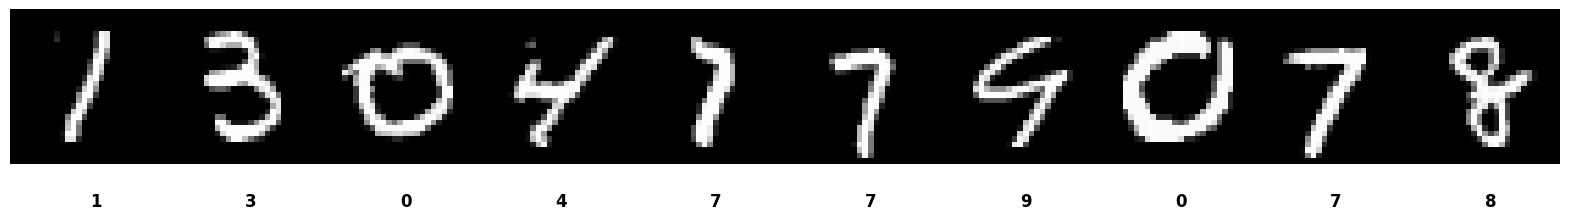

In [16]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

What kind of data occurs in our dataset?
How many data samples do we have in train and test datasets?
How many colour channels does the input variable have?
What is the size of the input images?
What is the necessary preprocessing of the input data X?
How many classes do we have in target varoable?
What is the necessary preprocessing of target variable y?

**1.3 Dataset preprocessing**

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [17]:
###################################
# Write your own code here #

y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

X_train_scaled = X_train.astype('float32') / 255.0
X_test_scaled = X_test.astype('float32') / 255.0

###################################

**2. Build the model**

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)

**2.1 Define the model structure**

In [25]:
model = Sequential()
###################################
# Write your own code here #

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

###################################

**2.2 Compile the model**

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [26]:
loss = keras.losses.categorical_crossentropy
optimizer = keras.optimizers.Adadelta()
metrics = 'accuracy'
learning_rate = 0.0001
optimizer = Adam(learning_rate = learning_rate)

###################################
# Write your own code here #

model.compile(loss = loss, optimizer = optimizer,metrics = [metrics])

###################################
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 22, 22, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,570 (510.04 KB)

 Trainable params: 130,570 (510.04 KB)

 Non-trainable params: 0 (0.00 B)

**3. Training stage**

**3.1 Model training**

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [28]:
###################################
# Write your own code here #

history = model.fit(X_train_scaled, y_train_encoded, epochs=30, batch_size=256,validation_split=0.2, verbose=1)

###################################

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9875 - loss: 0.0403 - val_accuracy: 0.9852 - val_loss: 0.0520
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9884 - loss: 0.0381 - val_accuracy: 0.9852 - val_loss: 0.0496
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9887 - loss: 0.0359 - val_accuracy: 0.9858 - val_loss: 0.0508
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9892 - loss: 0.0346 - val_accuracy: 0.9843 - val_loss: 0.0492
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9894 - loss: 0.0355 - val_accuracy: 0.9864 - val_loss: 0.0502
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9903 - loss: 0.0326 - val_accuracy: 0.9846 - val_loss: 0.0510
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9908 - loss: 0.0315 - val_accuracy: 0.9855 - val_loss: 0.0488
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9907 - loss: 0.0299 - val_accu

**3.1 Model Evaluation on validation data**

Plot the development of the training and validation loss, and training and validation metrics.

Text(0, 0.5, 'Accuracy')

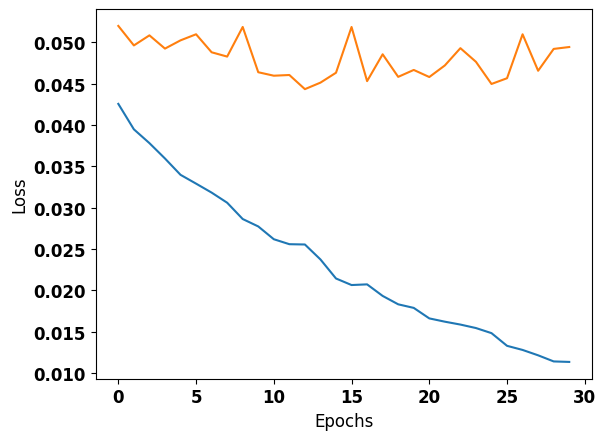

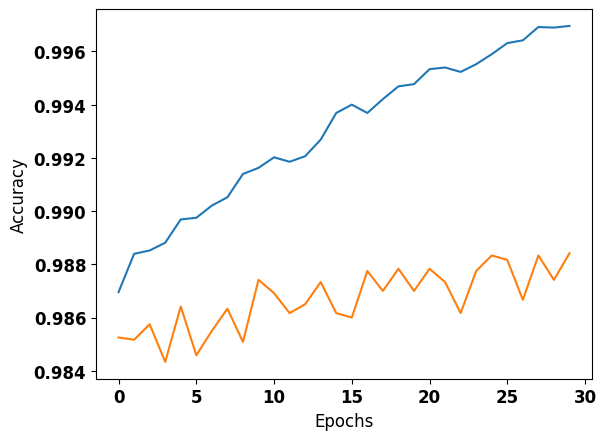

In [29]:
###################################
# Write your own code here #

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

###################################

**4. Model evaluation**

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

In [31]:
###################################
# Write your own code here #

score = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

###################################

Test loss: 0.04200664535164833
Test accuracy: 98.82000088691711 %


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


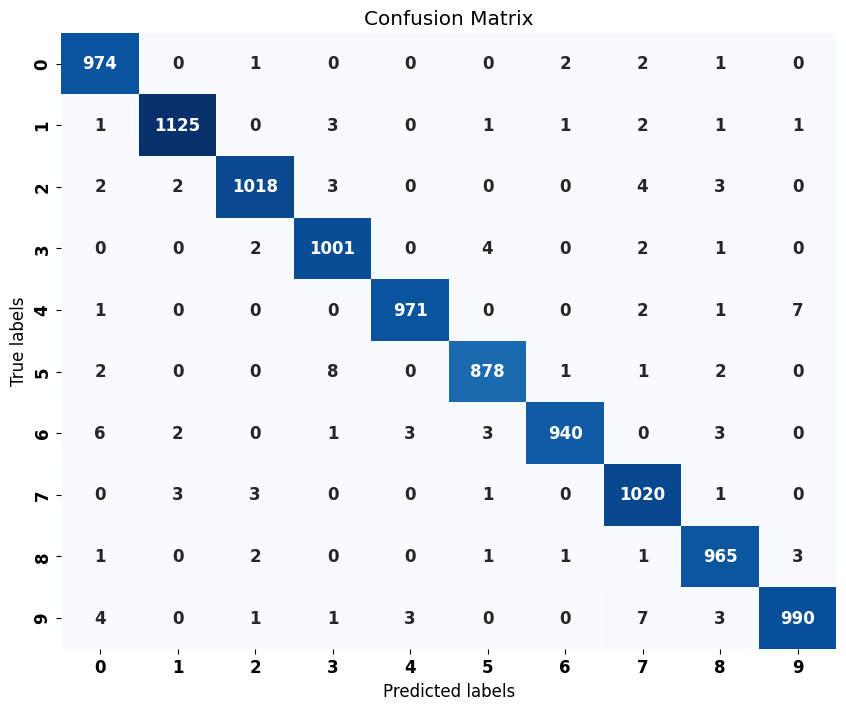

In [32]:
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**5. Hyperparameter tunning and regularization techniques**

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it